# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

Cargamos el df con los datos necesarios, usamos info y describe para conocer el estado de nuestro df.

In [2]:
df = pd.read_csv("advertising 2.csv", sep=(","))
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

# 1. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
df.describe(include="all")

Daily Time Spent on Site          Age   Area Income  \
count                1000.000000  1000.000000   1000.000000   
unique                       NaN          NaN           NaN   
top                          NaN          NaN           NaN   
freq                         NaN          NaN           NaN   
mean                   65.000200    36.009000  55000.000080   
std                    15.853615     8.785562  13414.634022   
min                    32.600000    19.000000  13996.500000   
25%                    51.360000    29.000000  47031.802500   
50%                    68.215000    35.000000  57012.300000   
75%                    78.547500    42.000000  65470.635000   
max                    91.430000    61.000000  79484.800000   

        Daily Internet Usage                       Ad Topic Line       City  \
count            1000.000000                                1000       1000   
unique                   NaN                                1000        969   
top                      NaN  Cloned 5thgeneration orchestration  Lisamouth   
freq                     NaN                                   1          3   
mean              180.000100                                 NaN        NaN   
std                43.902339                                 NaN        NaN   
min               104.780000                                 NaN        NaN   
25%               138.830000                                 NaN        NaN   
50%               183.130000                                 NaN        NaN   
75%               218.792500                                 NaN        NaN   
max               269.960000                                 NaN        NaN   

               Male Country            Timestamp  Clicked on Ad  
count   1000.000000    1000                 1000     1000.00000  
unique          NaN     237                 1000            NaN  
top             NaN  France  2016-03-27 00:53:11            NaN  
freq            NaN       9                    1            NaN  
mean       0.481000     NaN                  NaN        0.50000  
std        0.499889     NaN                  NaN        0.50025  
min        0.000000     NaN                  NaN        0.00000  
25%        0.000000     NaN                  NaN        0.00000  
50%        0.000000     NaN                  NaN        0.50000  
75%        1.000000     NaN                  NaN        1.00000  
max        1.000000     NaN                  NaN        1.00000

In [5]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [6]:
df["Male"].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

Usamos un pairplot para conocer las x respecto las y (clicled on ad) y  así conocer su compartamiento

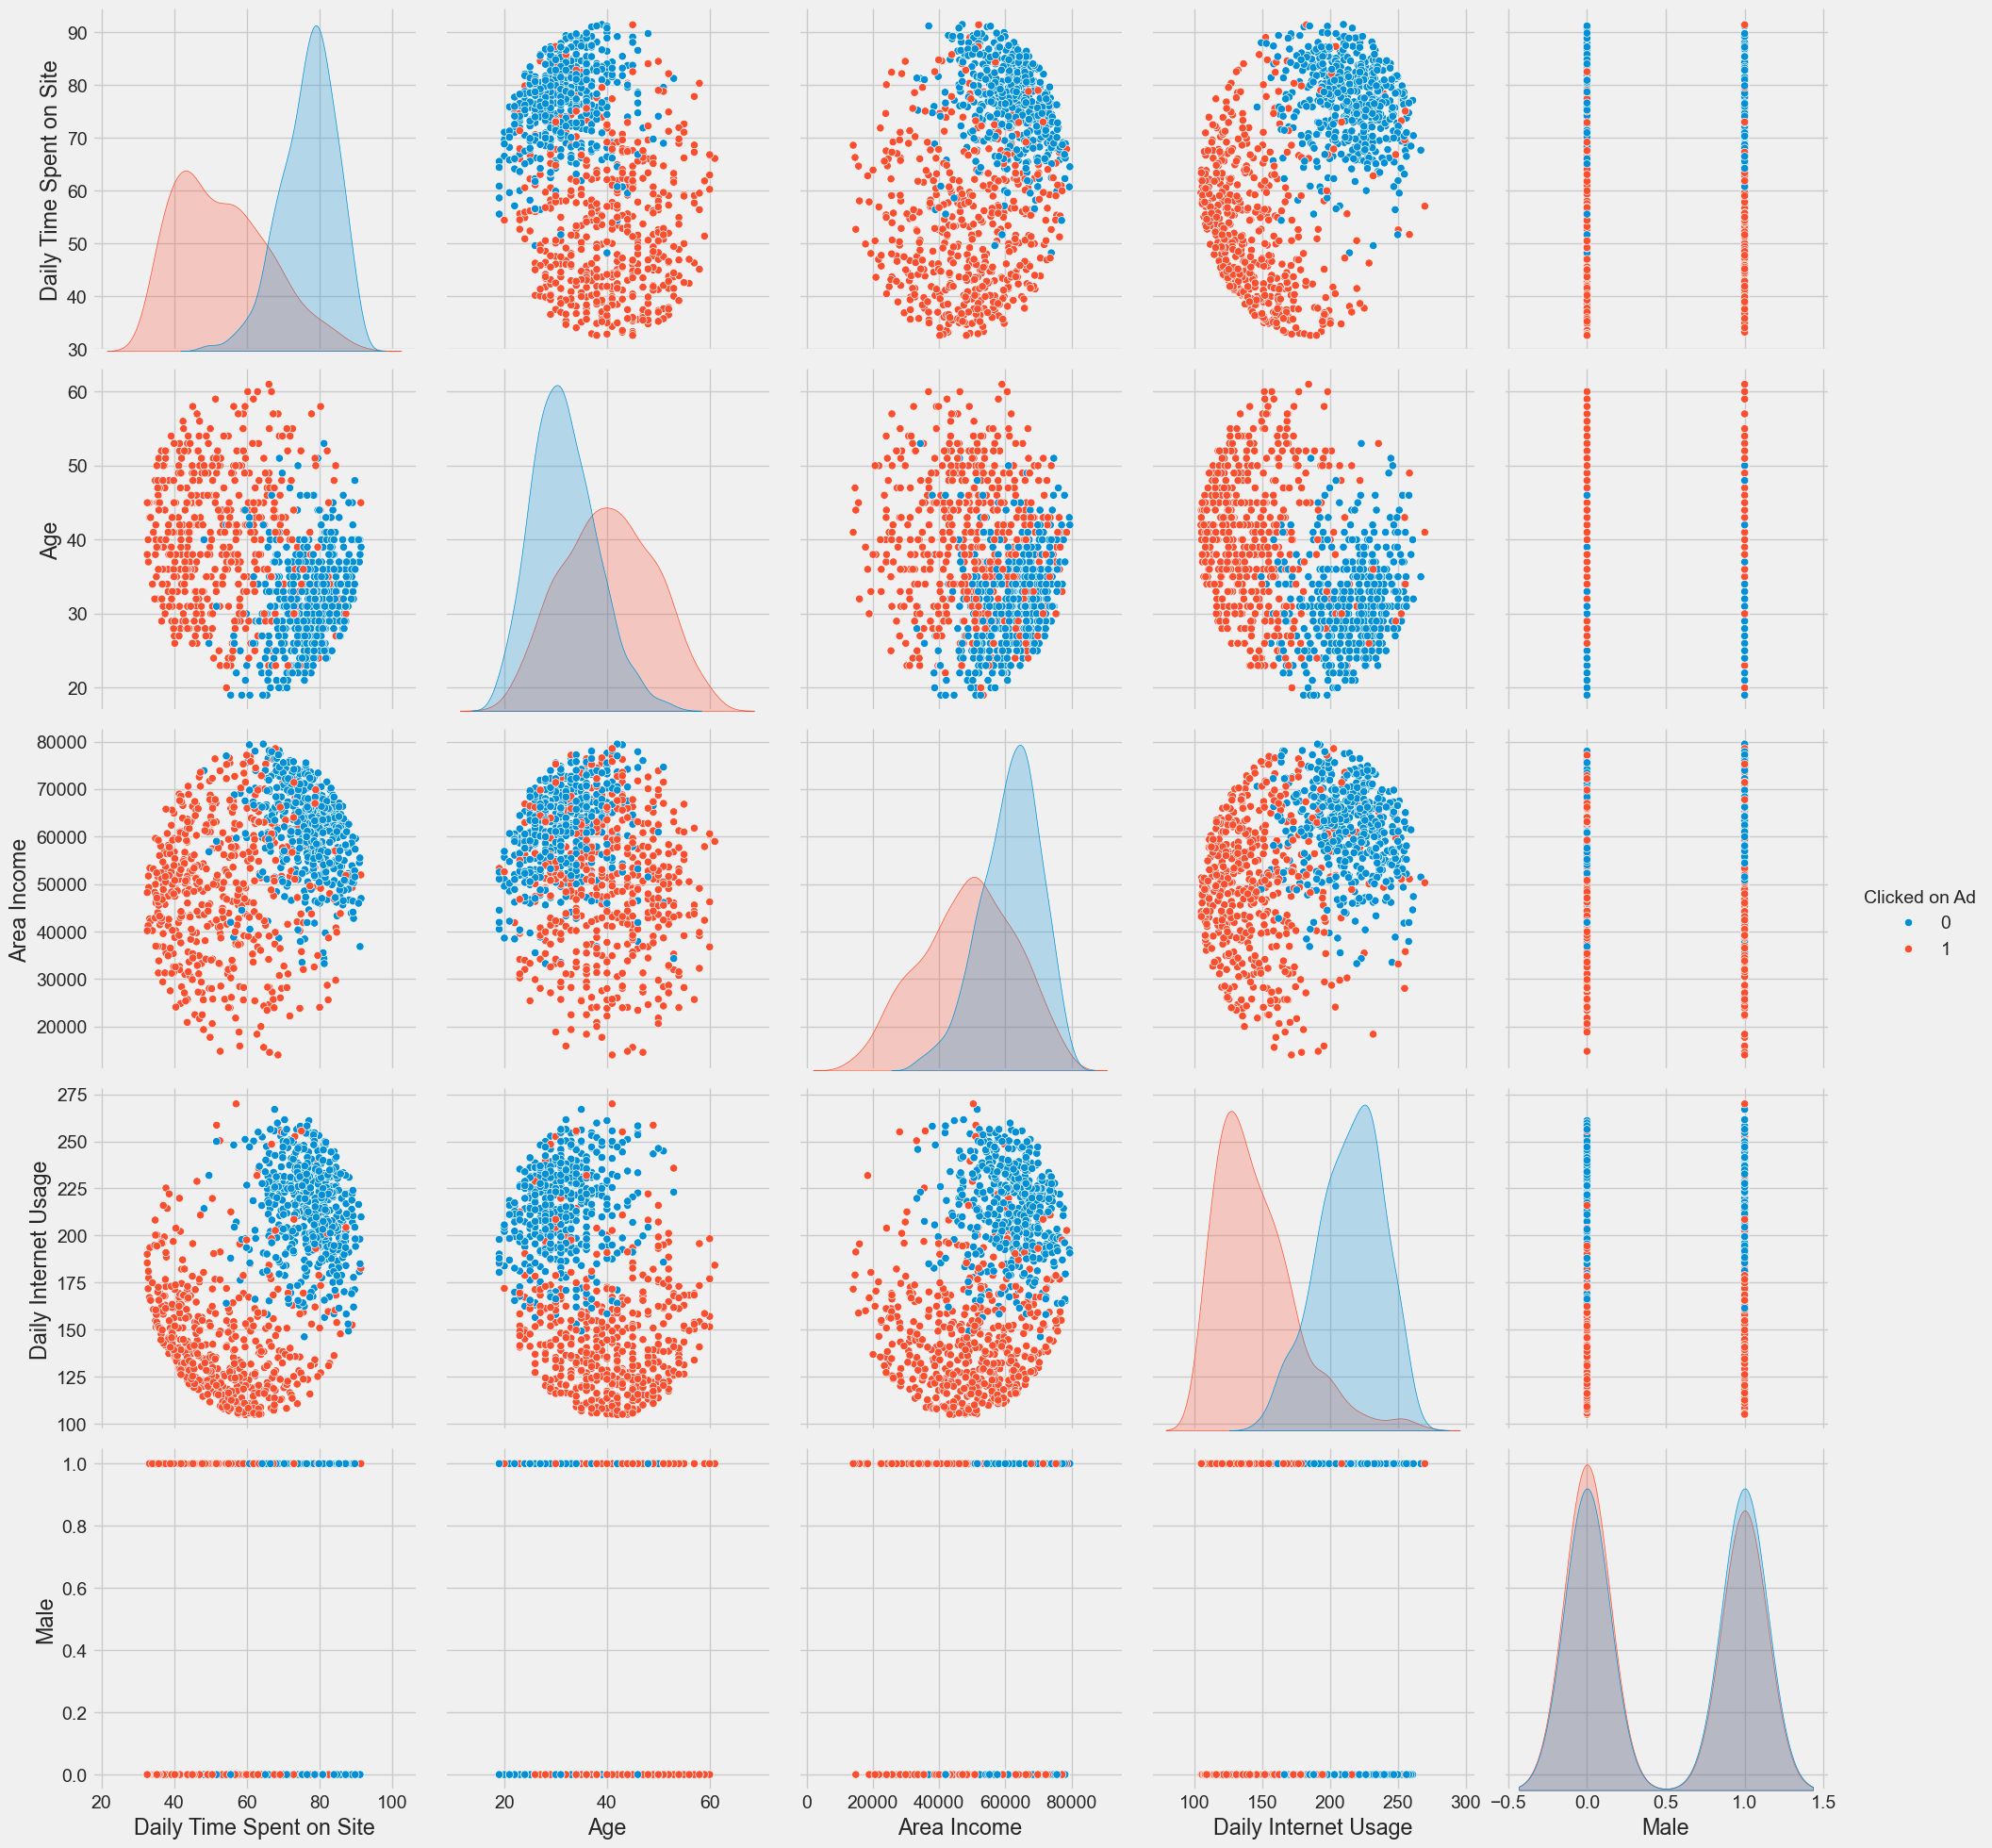

In [7]:
sns.pairplot(df.dropna(),
            hue='Clicked on Ad',
            height=4,
            vars= ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']);

Generamos un heatmap para conocer la correlación de las x con las y. En este caso vemos que la variable (age) es la que más relación tiene con y (en principio)

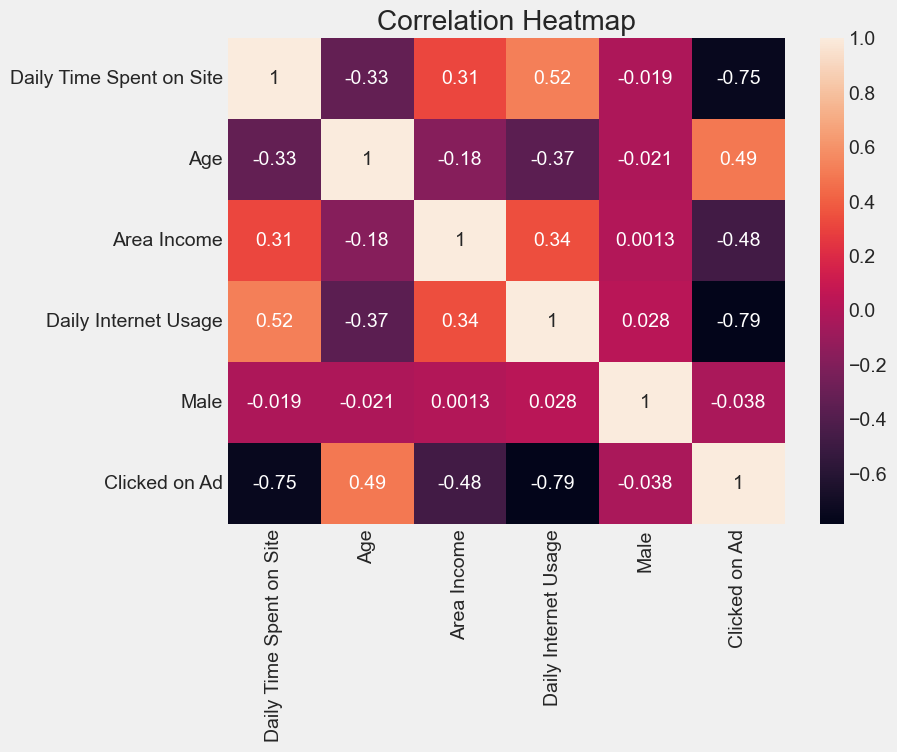

In [8]:
#Selecciona las columnas deseadas
columns_of_interest = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']

#Extrae esas columnas del dataframe
df_subset = df[columns_of_interest]

#Calcula la matriz de correlación
correlation_matrix = df_subset.corr()

#Genera el heatmap
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# 2. Prepare Data for Logistic Regression


Preparamos el df para la Regresión Logísitica, en este caso hicimos diferentes cambios para saber qué columnas eran relevantes para nuestro estudio


#### 1. Feature engineering


In [9]:
df.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

En este caso, hemos añadido una columna en la que si la columna Ad Topic Line contenia "orchestration"  agregara un 1 sino 0 en la columna "Clicked on Ad"

In [10]:
# Crea una columna en donde si "orchestration" se encuentra dentro de "Ad Topic Line" valga 1 y si no 0
orchestration = []

for i in df["Ad Topic Line"]:
    if "orchestration" in i:
        orchestration.append(1)
    else:
        orchestration.append(0)


In [11]:
df["orchestration"]= orchestration
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  orchestration  
0                   Tunisia  2016-03-27 00:53:11              0              1  
1                     Nauru  2016-04-04 01:39:02              0              0  
2                San Marino  2016-03-13 20:35:42              0              0  
3                     Italy  2016-01-10 02:31:19              0              0  
4                   Iceland  2016-06-03 03:36:18              0              0  
..                      ...                  ...            ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1              0  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1              0  
997                Mongolia  2016-02-01 17:24:57              1              0  
998               Guatemala  2016-03-24 02:35:54              0              0  
999                  Brazil  2016-06-03 21:43:21              1              0  

[1000 rows x 11 columns]

Aquí usamos la función LabelEncoder. Es una herramienta de preprocesamiento de datos en Python (parte de la biblioteca sklearn) que se utiliza para convertir etiquetas categóricas (como texto) en valores numéricos. Este proceso es necesario cuando se trabaja con modelos de machine learning, que generalmente requieren entradas numéricas.

Por ejemplo, convierte clases como "rojo", "azul", "verde" en valores numéricos como 0, 1, 2.

In [12]:
# Aplica un Label Encoder a Ad Topic Line y City
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'Color'
df["City"] = le.fit_transform(df["City"])
df["Ad Topic Line"] = le.fit_transform(df["Ad Topic Line"])


Como no nos han servido de nada, eliminamos las columnas :(

In [13]:
# Haz un drop de la siguentes columnas 'Ad Topic Line', 'City', 'Male', 'Country', 'orchestration'
#Creamos una variable y la eliminamos ahi

df_2 = df
df_2 = df_2.drop(['Ad Topic Line', 'City', 'Male', 'Country', 'orchestration'], axis=1)


Convertimos la columna Timestamp a datatime y cada elemento lo pasamos a una columna


In [14]:
# Convierte la columna Timestamp a datetime
df_2["Timestamp"] = pd.to_datetime(df_2["Timestamp"])

In [15]:
# Crea tres columnas nuevas que sean: "month", "hour", "weekday".
# Usa la columna "Timestamp" para extraer esos valores

df_2["month"]= df_2["Timestamp"].dt.month 
df_2["hour"] = df_2["Timestamp"].dt.hour
df_2["weekday"] = df_2["Timestamp"].dt.weekday

Hacemos lo mismo para los datos que hemos obtenido, visualizamos dichos datos con pairplot y heatmap

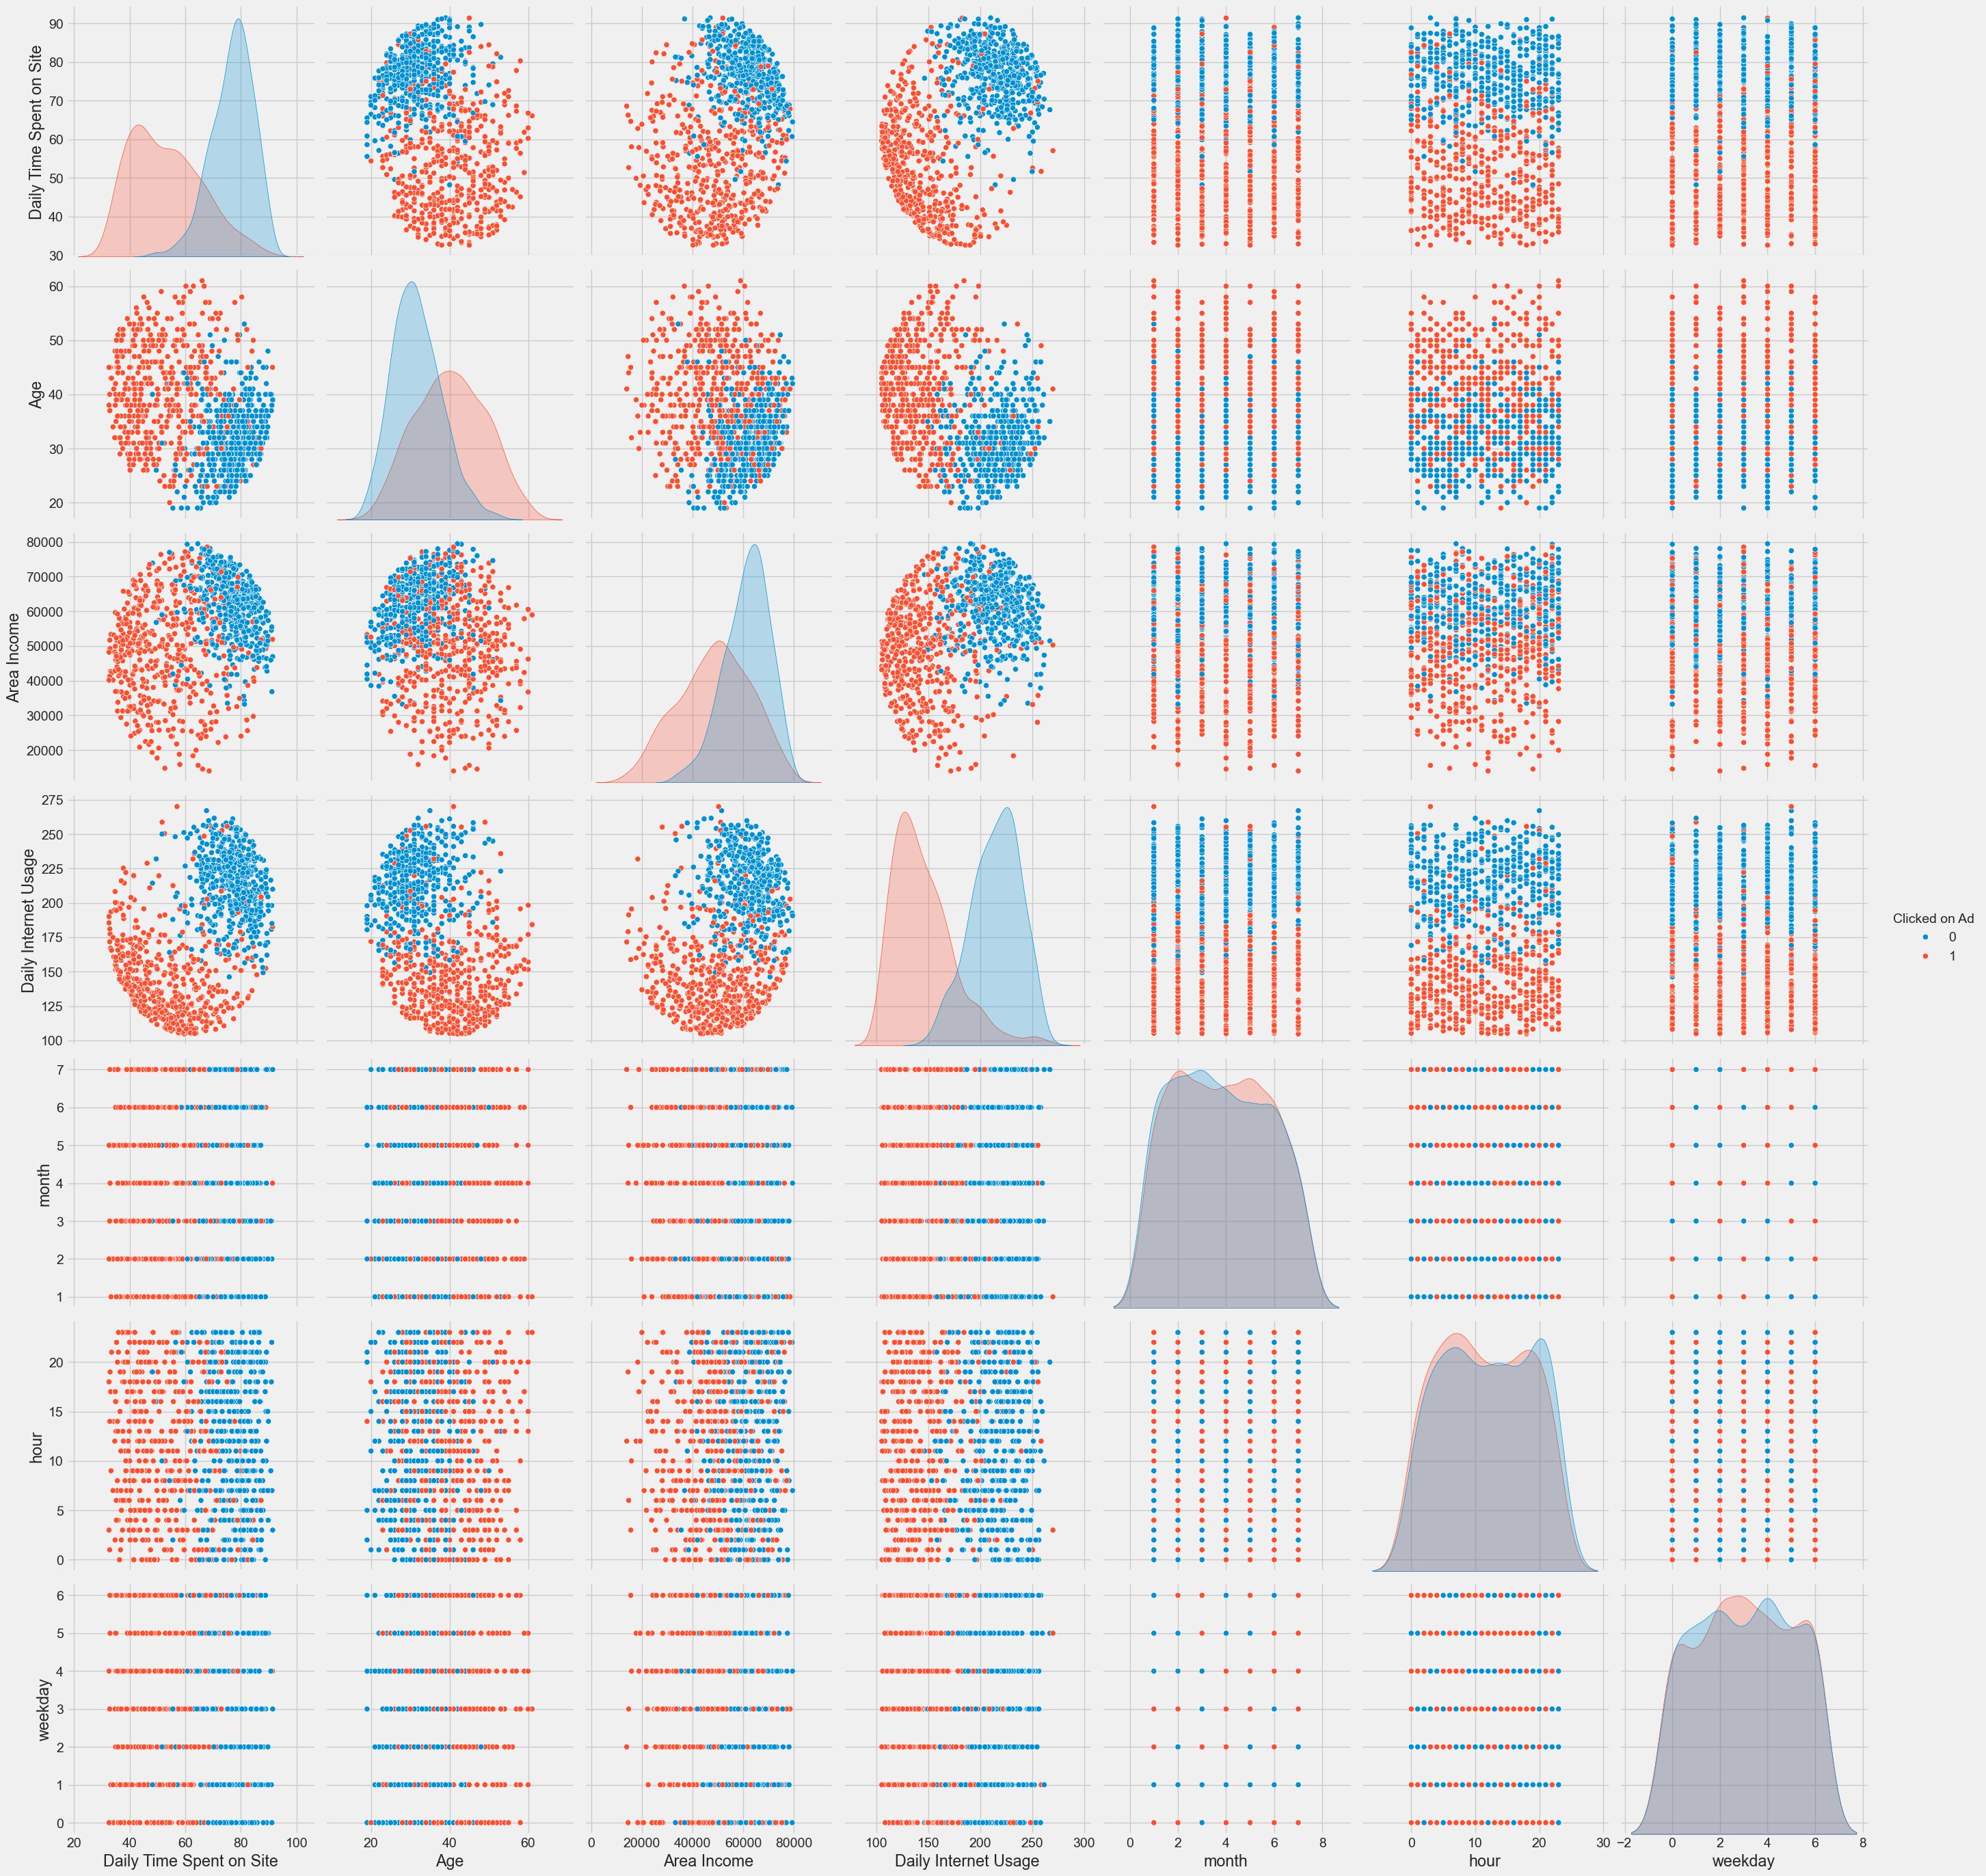

In [16]:
# en el sns.pairplot , metele de argumento hue= "Clicked on Ad"
sns.pairplot(df_2.dropna(),
            hue='Clicked on Ad',
            height=4,
            vars= ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'month', 'hour','weekday']);


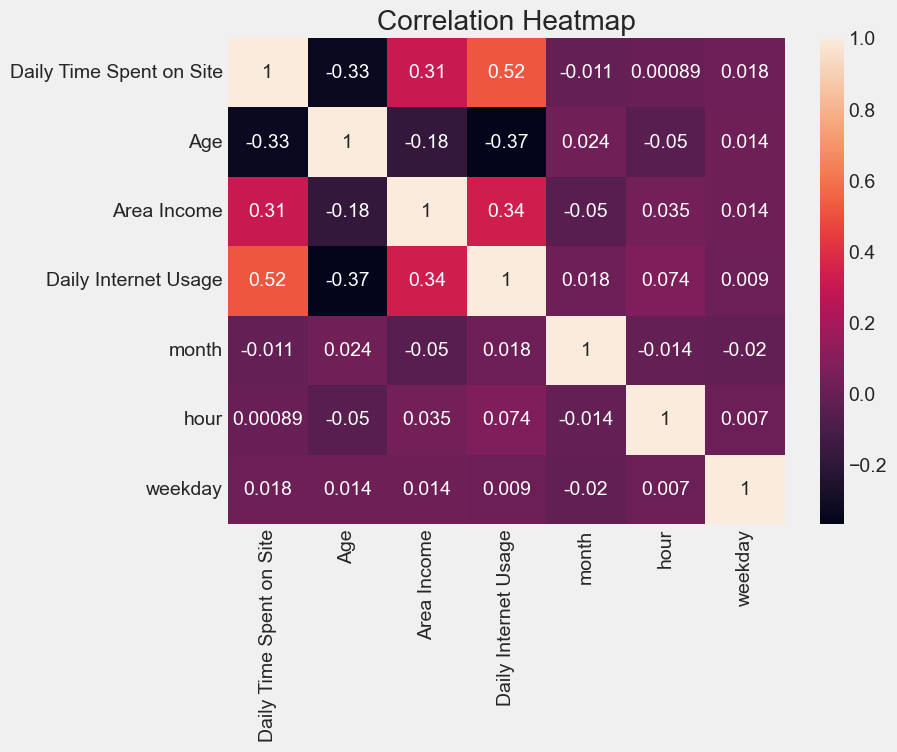

In [17]:
#Selecciona las columnas deseadas
columns_of_interest = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'month', 'hour','weekday']

#Extrae esas columnas del dataframe
df_subset_2 = df_2[columns_of_interest]

#Calcula la matriz de correlación
correlation_matrix = df_subset_2.corr()

#Genera el heatmap
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Ahora haz un drop de las columnas 'month', 'hour', 'weekday'.
# Si ya sé que las acabas de crear, pero asi es la vida :)

df_3 = df_2.drop(['month', 'hour', 'weekday'], axis=1)
df_3

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

              Timestamp  Clicked on Ad  
0   2016-03-27 00:53:11              0  
1   2016-04-04 01:39:02              0  
2   2016-03-13 20:35:42              0  
3   2016-01-10 02:31:19              0  
4   2016-06-03 03:36:18              0  
..                  ...            ...  
995 2016-02-11 21:49:00              1  
996 2016-04-22 02:07:01              1  
997 2016-02-01 17:24:57              1  
998 2016-03-24 02:35:54              0  
999 2016-06-03 21:43:21              1  

[1000 rows x 6 columns]

## Ahora si, pasamos al modelo de Machine Learning


#### 2. Train test split


Separamos X e Y para el modelo de entrenamiento

In [19]:
# Nuestra < y > (target) será "Clicked on Ad"
X = np.array(df_3.drop(["Clicked on Ad", "Timestamp" ], axis= 1))
y = np.array(df_3["Clicked on Ad"])

Asignamos un 80% de los datos para entrenarlos y un 20% para test

In [20]:
# train_test_split test_size = 0.2, random_state = 0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Train features shape: (800, 4)
Train target shape: (800,)
Test features shape: (200, 4)
Test target shape: (200,)



#### 3. StandardScaler() o Normalización de los datos


En este aparado de normalizan los datos con el método Standar Scaler. 

StandardScaler es una técnica de normalización en machine learning que se utiliza para escalar las características de los datos, transformándolas de manera que tengan una media de 0 y una desviación estándar de 1.

Esto es útil porque muchos algoritmos de machine learning (como regresión logística, SVM o k-NN) funcionan mejor cuando las características están en la misma escala, evitando que variables con mayores rangos dominen el modelo.

In [22]:
# Lo siguiente es la forma correcta de hacerlo, existe la posibilidad de hacer scaler.fit_transform pero no es recomendable
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
scaler.inverse_transform(X_train)

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02]])

# 3. Implement Logistic Regression in Scikit-Learn and predict

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
#model.fit(X, y)

Este paso no es imprescindible pero aquí lo que nos ha pedido es que hagamos un cross validation, es decir, que entrenemos antes los datos, pero este no es el modelo de machine learning.

In [27]:
from sklearn.model_selection import KFold, cross_val_score

# crea dos variables un LogisticRegression sin entrenar y un KFold(n_splits = 5)
kfold = KFold(n_splits = 5)

# luego crea la varible que use cross_val_score que tenga dentro lo siguiente en este orden: 
cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")

In [28]:
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.96875 0.95    0.98125 0.95625 0.98125]
0.9675
0.012747548783981946


# 4. Evaluate models


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Crea un variable y_pred que sean las predicciones del X_test
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

In [32]:
# accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.98


#### 1. Confusion Matrix


En este caso, para la Regresión Logistica se cre la matriz de confusión: Una matriz de confusión es una herramienta utilizada en machine learning para evaluar el rendimiento de un modelo de clasificación. Representa un resumen de las predicciones hechas por el modelo en comparación con las etiquetas verdaderas (reales). Permite visualizar de manera clara qué tan bien o mal está funcionando un clasificador, proporcionando información detallada sobre los errores cometidos.

107: Verdaderos positivos (TP) — El modelo predijo correctamente la clase positiva (1) para 107 instancias.
1: Falsos negativos (FN) — El modelo predijo incorrectamente la clase negativa (0) para 1 instancia que en realidad es positiva.
3: Falsos positivos (FP) — El modelo predijo incorrectamente la clase positiva (1) para 3 instancias que en realidad son negativas.
89: Verdaderos negativos (TN) — El modelo predijo correctamente la clase negativa (0) para 89 instancias.

Entonces se hace una media de ello, sumamos 107+89/total (107+89+1+3) = 0.98 

La precisión es 0.98, lo que significa que el modelo hizo predicciones correctas en el 98% de las instancias

In [33]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[107,   1],
       [  3,  89]])

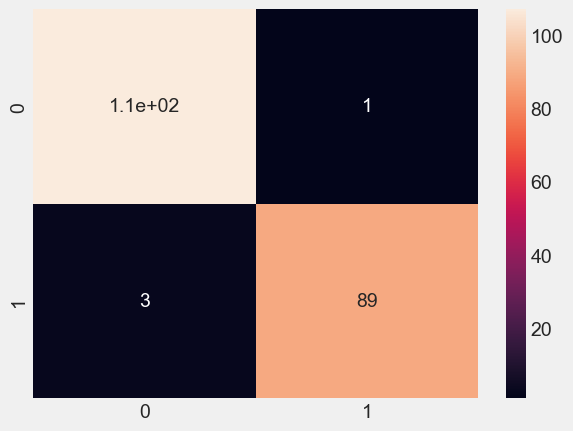

In [34]:
sns.heatmap(c_matrix, annot=True);

Con los datos obtenidos en la matriz de confusión sacamos la Presición, el Recall y el F1 Score: 

La precisión mide la exactitud de las predicciones positivas realizadas por el modelo. Es la proporción de predicciones positivas correctas sobre el total de predicciones positivas (tanto correctas como incorrectas).

**Precisión/ p= TP/(TP+FP) = 89/(89+1)**

El recall mide la capacidad del modelo para encontrar todas las instancias positivas. Es la proporción de predicciones positivas correctas sobre el total de instancias positivas reales (tanto las correctamente clasificadas como las que el modelo no detectó).

**Recall/  r= TP/(TP+FN) = 89/(89+3)**

El F1-score es una medida combinada que armoniza la precisión y el recall, y es especialmente útil cuando hay un desequilibrio de clases (por ejemplo, cuando una clase es mucho más frecuente que la otra). El F1-score busca un equilibrio entre la precisión y el recall, tomando su media armónica.

**F1 Score =  2*precision*recall/(precision + recall) o 2*p*r/(p+r)**

La curva ROC es una herramienta muy útil para evaluar el rendimiento de un modelo de clasificación, especialmente cuando se trata de clasificaciones binarias (clase positiva o negativa). La curva muestra la relación entre dos métricas clave que ayudan a determinar cuán bien está funcionando un modelo:


#### 2. Precision


In [35]:
# TP/(TP+FP) = 89/(89+1)

In [36]:
p = 89/(89+1)
p

0.9888888888888889



#### 3. Recall


In [37]:
# TP/(TP+FN) = 89/(89+3)

In [38]:
r = 89/(89+3)
r

0.967391304347826



#### 4. F1 Score


In [39]:
# 2*precision*recall/(precision + recall) 

In [40]:
2*p*r/(p+r)

0.978021978021978



#### 5. ROC curve

In [41]:
roc_auc_score(y_test, y_pred)

0.9790660225442834

En regresión logística, el modelo thresholds predice probabilidades para cada clase (por ejemplo, la probabilidad de que una instancia pertenezca a la clase positiva). Sin embargo, estas probabilidades deben ser convertidas en clases 0 o 1 (o "negativo" o "positivo") para tomar decisiones. El threshold (umbral de decisión) es el valor que se utiliza para hacer esa conversión.

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [43]:
thresholds

array([inf,  1.,  0.])

Text(0, 0.5, 'True Positive Rate')

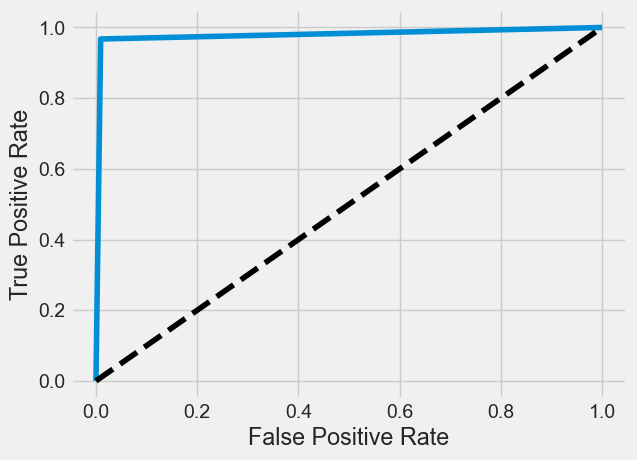

In [44]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [45]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[9.71389146e-01, 2.86108541e-02],
       [9.84800589e-01, 1.51994112e-02],
       [9.92185140e-01, 7.81486017e-03],
       [6.47784911e-04, 9.99352215e-01],
       [9.62703504e-01, 3.72964956e-02],
       [1.81679348e-05, 9.99981832e-01],
       [4.00181717e-04, 9.99599818e-01],
       [1.39008429e-04, 9.99860992e-01],
       [9.91616546e-01, 8.38345380e-03],
       [1.07257676e-01, 8.92742324e-01],
       [9.91173166e-01, 8.82683357e-03],
       [8.15839312e-01, 1.84160688e-01],
       [2.91789722e-04, 9.99708210e-01],
       [9.92177747e-01, 7.82225308e-03],
       [9.57998448e-01, 4.20015516e-02],
       [9.48277590e-01, 5.17224099e-02],
       [2.32512290e-03, 9.97674877e-01],
       [9.88280666e-01, 1.17193344e-02],
       [1.00736065e-04, 9.99899264e-01],
       [9.93474214e-01, 6.52578565e-03],
       [9.68038977e-01, 3.19610226e-02],
       [9.58166543e-01, 4.18334570e-02],
       [9.91088886e-01, 8.91111394e-03],
       [9.35939137e-01, 6.40608634e-02],
       [3.931712

In [46]:
model.classes_

array([0, 1])

In [47]:
pred_prob_1 = y_pred_prob[:,1]

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_1)

In [49]:
# fpr = FP/(TN+FP)

In [50]:
fpr[4]

0.009259259259259259

In [51]:
# tpr = TP/(TP+FN)

In [52]:
tpr[4]

0.967391304347826

In [53]:
thresholds

array([       inf, 0.99998183, 0.81620643, 0.78771969, 0.53356725,
       0.23506988, 0.20636059, 0.20154412, 0.18942739, 0.08879263,
       0.08399575, 0.00594902])

Text(0, 0.5, 'True Positive Rate')

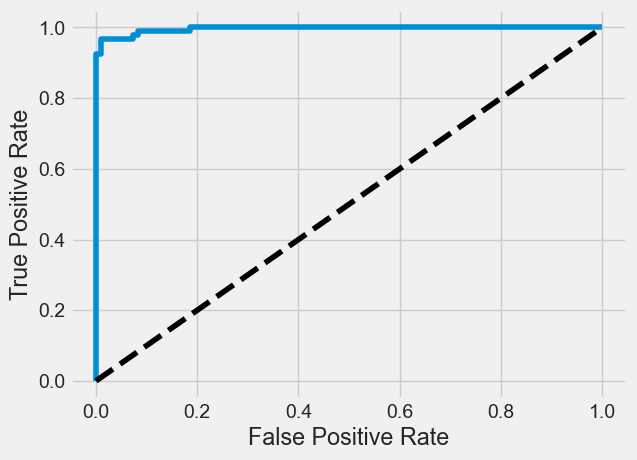

In [54]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [55]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
thresholds[ix]

0.5335672514356565

In [56]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [57]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob_1)

In [58]:
precisions

array([0.46      , 0.46231156, 0.46464646, 0.46700508, 0.46938776,
       0.47179487, 0.4742268 , 0.47668394, 0.47916667, 0.48167539,
       0.48421053, 0.48677249, 0.4893617 , 0.49197861, 0.49462366,
       0.4972973 , 0.5       , 0.50273224, 0.50549451, 0.50828729,
       0.51111111, 0.51396648, 0.51685393, 0.51977401, 0.52272727,
       0.52571429, 0.52873563, 0.53179191, 0.53488372, 0.5380117 ,
       0.54117647, 0.5443787 , 0.54761905, 0.5508982 , 0.55421687,
       0.55757576, 0.56097561, 0.56441718, 0.56790123, 0.57142857,
       0.575     , 0.57861635, 0.58227848, 0.58598726, 0.58974359,
       0.59354839, 0.5974026 , 0.60130719, 0.60526316, 0.60927152,
       0.61333333, 0.61744966, 0.62162162, 0.62585034, 0.63013699,
       0.63448276, 0.63888889, 0.64335664, 0.64788732, 0.65248227,
       0.65714286, 0.6618705 , 0.66666667, 0.67153285, 0.67647059,
       0.68148148, 0.68656716, 0.69172932, 0.6969697 , 0.70229008,
       0.70769231, 0.71317829, 0.71875   , 0.72440945, 0.73015

In [59]:
recalls

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [60]:
thresholds

array([0.00594902, 0.00612979, 0.00652579, 0.00669811, 0.00683621,
       0.0070459 , 0.00724171, 0.00741838, 0.00755668, 0.00761728,
       0.00769553, 0.00775984, 0.00781486, 0.00782225, 0.00815397,
       0.00838345, 0.00863632, 0.00869021, 0.00873854, 0.00878943,
       0.00882683, 0.00891111, 0.00917377, 0.00949288, 0.00954649,
       0.00962244, 0.0098283 , 0.00996395, 0.00996938, 0.01002465,
       0.01069348, 0.01079742, 0.01108839, 0.0110884 , 0.01154297,
       0.0116152 , 0.01171933, 0.01189141, 0.01294875, 0.01408188,
       0.01425259, 0.01458546, 0.01465319, 0.01472779, 0.01519941,
       0.01522173, 0.01589511, 0.01780485, 0.01846599, 0.0190099 ,
       0.0194592 , 0.02009966, 0.02030306, 0.02149007, 0.02207971,
       0.02224403, 0.02243686, 0.02266086, 0.02358409, 0.02375963,
       0.02400691, 0.02461785, 0.02581152, 0.02687543, 0.02858398,
       0.02861085, 0.02965328, 0.03057748, 0.03123639, 0.03134985,
       0.03196102, 0.03221763, 0.0372965 , 0.03995781, 0.04038

In [61]:
df_pr_curve = pd.DataFrame(precisions[1:], columns=['precisions'])
df_pr_curve['recalls'] = recalls[1:]
df_pr_curve['thresholds'] = thresholds
df_pr_curve

precisions   recalls  thresholds
0      0.462312  1.000000    0.005949
1      0.464646  1.000000    0.006130
2      0.467005  1.000000    0.006526
3      0.469388  1.000000    0.006698
4      0.471795  1.000000    0.006836
..          ...       ...         ...
195    1.000000  0.043478    0.999958
196    1.000000  0.032609    0.999960
197    1.000000  0.021739    0.999961
198    1.000000  0.010870    0.999980
199    1.000000  0.000000    0.999982

[200 rows x 3 columns]

In [62]:
df_pr_curve[10:30]

precisions  recalls  thresholds
10    0.486772      1.0    0.007696
11    0.489362      1.0    0.007760
12    0.491979      1.0    0.007815
13    0.494624      1.0    0.007822
14    0.497297      1.0    0.008154
15    0.500000      1.0    0.008383
16    0.502732      1.0    0.008636
17    0.505495      1.0    0.008690
18    0.508287      1.0    0.008739
19    0.511111      1.0    0.008789
20    0.513966      1.0    0.008827
21    0.516854      1.0    0.008911
22    0.519774      1.0    0.009174
23    0.522727      1.0    0.009493
24    0.525714      1.0    0.009546
25    0.528736      1.0    0.009622
26    0.531792      1.0    0.009828
27    0.534884      1.0    0.009964
28    0.538012      1.0    0.009969
29    0.541176      1.0    0.010025

Text(0, 0.5, 'Recall')

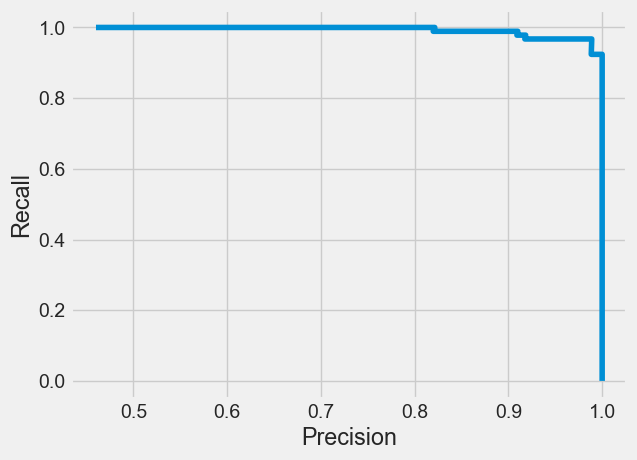

In [63]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")

### CONCLUSIONES

- Es un buen modelo de precisión

